In [ ]:
#here, all of the models perferoming relatively well was hyperparameter tuned.

import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\Agriqo(slider1) - Sheet1.csv"

data = pd.read_csv(data_dir)

col = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12']
data.drop(columns=col, axis=1, inplace=True)

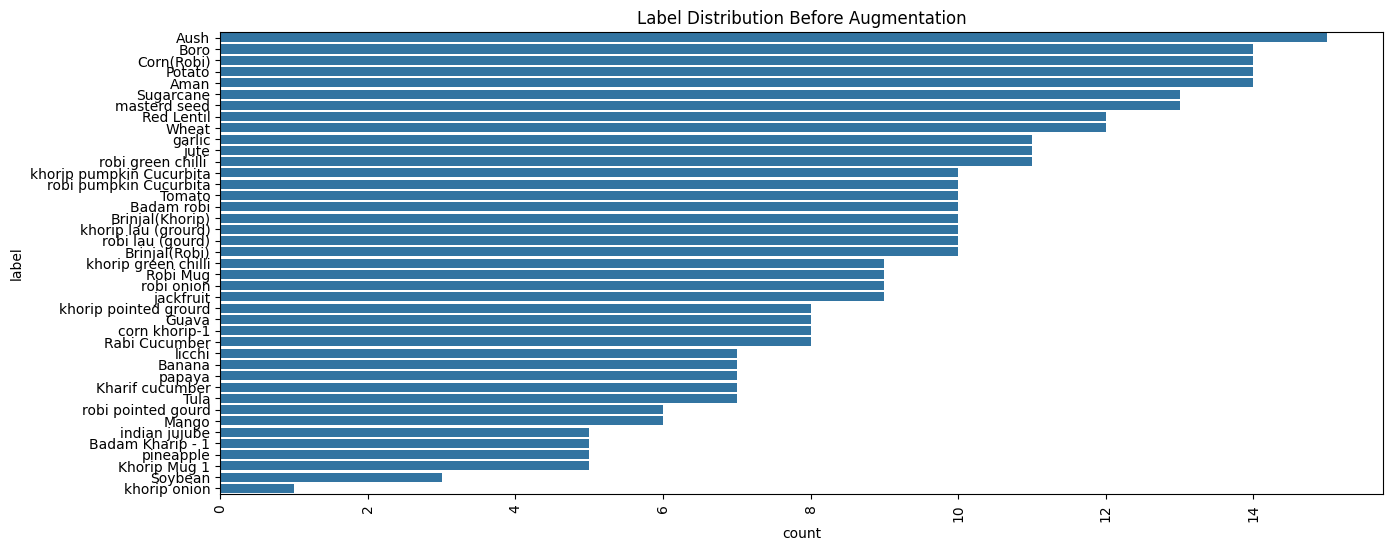

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.countplot(data['label'], order=data['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Label Distribution Before Augmentation")
plt.show()


In [25]:
target_per_class = 50

In [26]:
import numpy as np
import pandas as pd

augmented_data = []

numeric_cols = ['rainfall (mm)', 'temperature(avg)', 'humidity(avg)','sunlight(hour)', 'direction of wind(deg)', 'velocity of wind(km/h)']

grouped = data.groupby('label')

for label, group in grouped:
    n_existing = len(group)
    n_to_generate = max(0, target_per_class - n_existing)

    for _ in range(n_to_generate):
        row = group.sample(n=1, replace=True).iloc[0].copy()

        for col in numeric_cols:
            std_dev = group[col].std()
            if np.isnan(std_dev):
                std_dev = 1  # fallback
            noise = np.random.normal(0, std_dev * 0.1)
            row[col] += noise

        augmented_data.append(row)

augmented_df = pd.DataFrame(augmented_data)

print(f"Added {len(augmented_df)} augmented rows.")
data = pd.concat([data, augmented_df], ignore_index=True)
data.head()
data.to_csv("new.csv",index=False)

Added 1677 augmented rows.


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data['zone_encoded'] = label_encoder.fit_transform(data['Agricultural zone'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)
# data = pd.get_dummies(data, columns=['Agricultural zone'])

cols = ['label','Agricultural zone']
data.drop(columns=cols, axis=1, inplace=True)
data.head()
# data['temp_month']=data['temperature(avg)']*data['month(chara)']
data.drop(columns=['zone_encoded'],axis=1,inplace=True)

{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Tula': 20, 'Wheat': 21, 'corn khorip-1': 22, 'garlic': 23, 'indian jujube': 24, 'jackfruit': 25, 'jute': 26, 'khorip green chilli': 27, 'khorip lau (grourd)': 28, 'khorip onion': 29, 'khorip pointed grourd': 30, 'khorip pumpkin Cucurbita': 31, 'licchi': 32, 'masterd seed': 33, 'papaya': 34, 'pineapple': 35, 'robi green chilli ': 36, 'robi lau (gourd)': 37, 'robi onion': 38, 'robi pointed gourd': 39, 'robi pumpkin Cucurbita': 40}
{'Barisal': 0, 'Bogra': 1, 'Chittagonj': 2, 'Cumilla': 3, 'Dhaka': 4, 'Dinajpur': 5, 'Faridpur': 6, 'Jashore': 7, 'Khulna': 8, 'Mymensingh': 9, 'Rajshahi': 10, 'Rangamati': 11, 'Rangpur': 12, 'Sylhet': 13}


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics

X = data.drop(['label_encoded'],axis=1)
y = data['label_encoded']

X_t, X_val, y_t, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_t_scaled = scaler.fit_transform(X_t)

X_val_scaled = scaler.transform(X_val)

In [29]:

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [30]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'micro')
    recall = recall_score(y_test, y_pred,average = 'micro')
    f1 = f1_score(y_test, y_pred,average = 'micro')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

Decision Tree


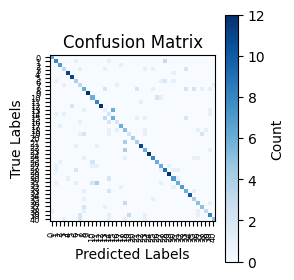

Random Forest


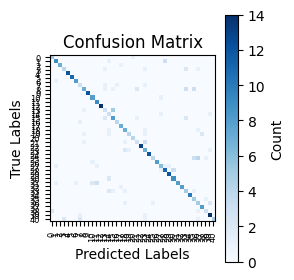

Gradient Boosting


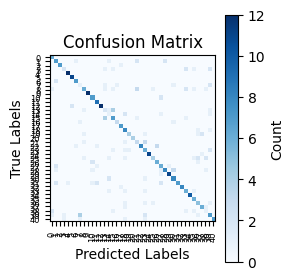

HistGradientBoosting


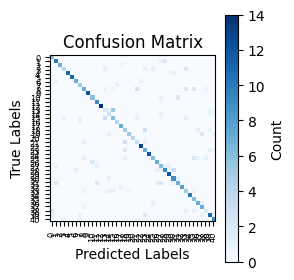

XGBoost


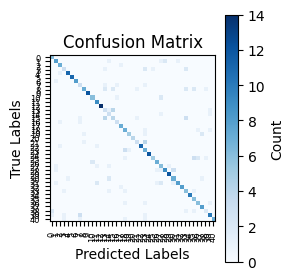

KNN


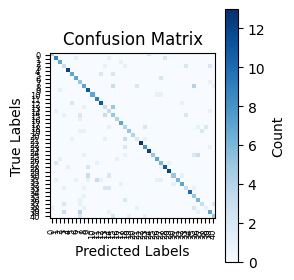

CatBoost
Learning rate set to 0.081148
0:	learn: 3.5451900	total: 54.7ms	remaining: 54.7s
1:	learn: 3.4018637	total: 105ms	remaining: 52.4s
2:	learn: 3.2790530	total: 165ms	remaining: 55s
3:	learn: 3.1888532	total: 257ms	remaining: 1m 3s
4:	learn: 3.0929510	total: 310ms	remaining: 1m 1s
5:	learn: 2.9956748	total: 358ms	remaining: 59.3s
6:	learn: 2.9032664	total: 409ms	remaining: 58.1s
7:	learn: 2.8175673	total: 457ms	remaining: 56.7s
8:	learn: 2.7378541	total: 510ms	remaining: 56.2s
9:	learn: 2.6736434	total: 561ms	remaining: 55.5s
10:	learn: 2.6154242	total: 611ms	remaining: 54.9s
11:	learn: 2.5445381	total: 660ms	remaining: 54.3s
12:	learn: 2.4904719	total: 710ms	remaining: 53.9s
13:	learn: 2.4369303	total: 762ms	remaining: 53.7s
14:	learn: 2.3833902	total: 817ms	remaining: 53.7s
15:	learn: 2.3384971	total: 865ms	remaining: 53.2s
16:	learn: 2.2963888	total: 912ms	remaining: 52.8s
17:	learn: 2.2588749	total: 959ms	remaining: 52.3s
18:	learn: 2.2206329	total: 1.01s	remaining: 52s
19:	l

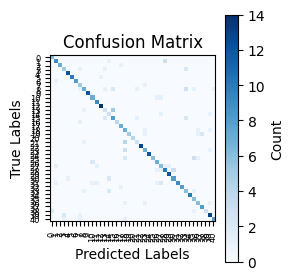

LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 7
[LightGBM] [Info] Start training from score -3.618262
[LightGBM] [Info] Start training from score -3.791534
[LightGBM] [Info] Start training from score -3.664782
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.764865
[LightGBM] [Info] Start training from score -3.738890
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.618262
[LightGBM] [Info] Start training from score -3.905944
[LightGBM] [Info] Start training from score -3.764865
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.818933
[L

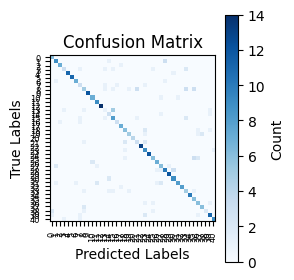

,Decision Tree,Random Forest,Gradient Boosting,HistGradientBoosting,XGBoost,KNN,CatBoost,LightGBM
Accuracy,0.646341,0.743902,0.656098,0.734146,0.709756,0.653659,0.763415,0.729268
Precision,0.646341,0.743902,0.656098,0.734146,0.709756,0.653659,0.763415,0.729268
Recall,0.646341,0.743902,0.656098,0.734146,0.709756,0.653659,0.763415,0.729268
F1 Score,0.646341,0.743902,0.656098,0.734146,0.709756,0.653659,0.763415,0.729268


In [31]:
results = {}
for name, model in models.items():
    print(name)
    accuracy, precision, recall, f1 = evaluate_model(model, X_t_scaled, y_t, X_val_scaled, y_val)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data

In [32]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=200)),
    ('hgb',HistGradientBoostingClassifier()),
    ('cat', CatBoostClassifier()),
], voting='soft')

voting_clf.fit(X_t_scaled, y_t)
accuracy = voting_clf.score(X_val_scaled, y_val)
print("Voting Classifier Test Accuracy:", accuracy)

Learning rate set to 0.081148
0:	learn: 3.5451900	total: 50.5ms	remaining: 50.4s
1:	learn: 3.4018637	total: 103ms	remaining: 51.6s
2:	learn: 3.2790530	total: 154ms	remaining: 51.1s
3:	learn: 3.1888532	total: 204ms	remaining: 50.7s
4:	learn: 3.0929510	total: 254ms	remaining: 50.5s
5:	learn: 2.9956748	total: 307ms	remaining: 50.9s
6:	learn: 2.9032664	total: 357ms	remaining: 50.6s
7:	learn: 2.8175673	total: 404ms	remaining: 50.1s
8:	learn: 2.7378541	total: 453ms	remaining: 49.9s
9:	learn: 2.6736434	total: 503ms	remaining: 49.8s
10:	learn: 2.6154242	total: 551ms	remaining: 49.5s
11:	learn: 2.5445381	total: 603ms	remaining: 49.6s
12:	learn: 2.4904719	total: 650ms	remaining: 49.4s
13:	learn: 2.4369303	total: 701ms	remaining: 49.4s
14:	learn: 2.3833902	total: 749ms	remaining: 49.2s
15:	learn: 2.3384971	total: 800ms	remaining: 49.2s
16:	learn: 2.2963888	total: 853ms	remaining: 49.3s
17:	learn: 2.2588749	total: 905ms	remaining: 49.4s
18:	learn: 2.2206329	total: 955ms	remaining: 49.3s
19:	learn:

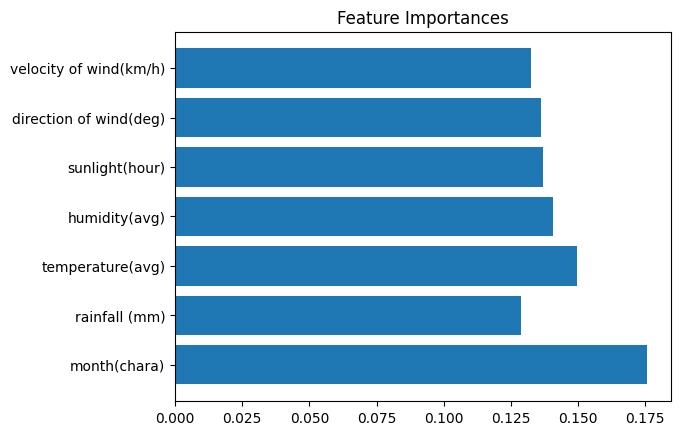

In [33]:
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_t, y_t)

importances = model.feature_importances_
features = X_t.columns

plt.barh(features, importances)
plt.title("Feature Importances")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_t, y_t)
print("Best Parameters:\n", random_search.best_params_)
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
y_pred = best_rf.predict(X_val)  # use your validation/test set
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.67      0.92      0.77        13
           2       0.88      0.88      0.88         8
           3       0.56      0.56      0.56         9
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        11
           6       0.78      0.78      0.78         9
           7       0.50      0.83      0.62         6
           8       0.70      0.41      0.52        17
           9       1.00      1.00      1.00        12
          10       0.73      0.89      0.80         9
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00        14
          13       0.42      0.56      0.48         9
          14       0.25      0.40      0.31         5
          15       0.70      0.54      0.61        13
          16       0.75      0.60      0.67         5
          17       0.67    

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [400, 500, 550, 600],
    'max_depth': [None],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [0, 1, 2],
    'max_features': ['log2'],
    'bootstrap': [True]
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_t, y_t)

print("Best GridSearch Params:\n", grid_search.best_params_)
best_grid_rf = grid_search.best_estimator_
y_pred_grid = best_grid_rf.predict(X_val)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_grid))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best GridSearch Params:
 {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.67      0.92      0.77        13
           2       0.88      0.88      0.88         8
           3       0.56      0.56      0.56         9
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00        11
           6       0.78      0.78      0.78         9
           7       0.50      0.83      0.62         6
           8       0.70      0.41      0.52        17
           9       1.00      1.00      1.00        12
          10       0.73      0.89      0.80         9
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00        14
          13       0.42  

In [ ]:
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [10, 20, 30, 40],
    'l2_regularization': [0, 1, 5, 10],
    'max_leaf_nodes': [31, 63, 127],  # Default is 31
}
hgb = HistGradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=hgb,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_t, y_t)

print("Best Parameters:\n", random_search.best_params_)

best_hgb = random_search.best_estimator_
y_pred_hgb = best_hgb.predict(X_val)

print(classification_report(y_val, y_pred_hgb))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
 {'min_samples_leaf': 40, 'max_leaf_nodes': 127, 'max_iter': 300, 'max_depth': 30, 'learning_rate': 0.2, 'l2_regularization': 1}
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.71      0.77      0.74        13
           2       0.78      0.88      0.82         8
           3       0.67      0.44      0.53         9
           4       1.00      1.00      1.00        12
           5       1.00      0.91      0.95        11
           6       0.86      0.67      0.75         9
           7       0.71      0.83      0.77         6
           8       0.46      0.35      0.40        17
           9       1.00      0.75      0.86        12
          10       0.58      0.78      0.67         9
          11       0.90      1.00      0.95         9
          12       0.88      1.00      0.93        14
          13       0.42      0.56  

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.17, 0.2,0.25],
    'max_iter': [250, 300,330],
    'min_samples_leaf': [40, 50],
    'l2_regularization': [1, 2],
}

grid_search = GridSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_t, y_t)

print("Best GridSearchCV Params:", grid_search.best_params_)
best_hgb_grid = grid_search.best_estimator_
y_pred_hgb = best_hgb_grid.predict(X_val)

print(classification_report(y_val, y_pred_hgb))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best GridSearchCV Params: {'l2_regularization': 1, 'learning_rate': 0.2, 'max_iter': 250, 'min_samples_leaf': 50}
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.71      0.77      0.74        13
           2       0.70      0.88      0.78         8
           3       0.67      0.44      0.53         9
           4       0.86      1.00      0.92        12
           5       1.00      1.00      1.00        11
           6       0.86      0.67      0.75         9
           7       0.62      0.83      0.71         6
           8       0.67      0.35      0.46        17
           9       1.00      1.00      1.00        12
          10       0.54      0.78      0.64         9
          11       0.90      1.00      0.95         9
          12       0.88      1.00      0.93        14
          13       0.27      0.33      0.30         9
          14 

In [ ]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=5,
    verbose=0,
    random_state=42
)
model.fit(X_t, y_t)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7439024390243902

In [ ]:
import lightgbm as lgb

train_data = lgb.Dataset(X_t, label=y_t)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 6,
    'num_leaves': 31,
    'verbose': -1
}

cv_results = lgb.cv(
    params,
    train_data,
    num_boost_round=1000,
    nfold=5,
    metrics='auc',
    seed=42
)

print(cv_results)

print("Best AUC:", max(cv_results['valid auc-mean']))
print("Best iteration:", len(cv_results['valid auc-mean']))


{'valid auc-mean': [0.9334430784134448, 0.9587105701410659, 0.9498012996342737, 0.9494539685649601, 0.9502192724660397, 0.9712901101532566, 0.9713766980146291, 0.9722634208463949, 0.9736556839951238, 0.9739935725792407, 0.9744369339951235, 0.9751335553814002, 0.975334078935911, 0.9752116803814003, 0.9753510046586555, 0.9754987917972832, 0.9759506160745385, 0.984423028779171, 0.984344903779171, 0.9843533666405433, 0.984632015195054, 0.9853634676506443, 0.985224143373389, 0.9857117783437825, 0.9855112547892719, 0.9852326062347613, 0.9857202412051549, 0.9857899033437827, 0.9855724540665273, 0.985798366205155, 0.985798366205155, 0.985798366205155, 0.9855893797892721, 0.9858068290665274, 0.9777260209857193, 0.9777956831243471, 0.9780743316788575, 0.9783181491640545, 0.9782484870254267, 0.9781091627481713, 0.978674922718565, 0.9784574734413096, 0.9830636374521072, 0.9829939753134797, 0.982924313174852, 0.9879399871560433, 0.9880793114332984, 0.9883579599878092, 0.9882186357105539, 0.98821863

In [ ]:
model = lgb.LGBMClassifier(
    objective='multiclass',
    learning_rate=0.05,
    max_depth=6,
    num_leaves=31,
    n_estimators=1000,
    random_state=42
)

model.fit(X_t, y_t)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7219512195121951